---
title: "Sampling Distribution"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-14"
categories: [python, datacamp, statistics, machine learning, sampling, distribution ]
image: "samplingDistribution.jpg"

---

# Sampling Distribution

We will discover how to quantify the accuracy of sample statistics using relative errors, and measure variation in your estimates by generating sampling distributions.

This **Sampling Distribution** is part of [Datacamp course: Introduction to sampling](https://app.datacamp.com/learn/courses/sampling-in-python)

This is my learning experience of data science through DataCamp

In [1]:
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
import numpy as np

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

## Relative error of point estimates
The size of the sample has a significant impact on the accuracy of the point estimates.

**Relative error vs. sample size**

* Really noise, particularly for small samples
* Amplitude is initially steep, then flattens
* Relative error decreases to zero (when the sample size = population)

### Calculating relative errors

It is important for a sample mean to be close to the population mean when it is calculated. There is, however, a possibility that this may not be the case if your sample size is too small.

Relative error is the most common metric for assessing accuracy. This is the difference between the population parameter and the point estimate, divided by the population parameter. Sometimes it is expressed as a percentage.

In [2]:
attrition_pop=pd.read_feather('dataset/attrition.feather')
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [4]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()
mean_attrition_pop= attrition_pop['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [6]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)
print("\n As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases")

6.962025316455695

 As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases


### Creating a sampling distribution

**Replicating samples**

Whenever you calculate a point estimate, such as a sample mean, the value you calculate depends on the rows included in the sample. As a result, there is some randomness in the answer. A sample mean (or another statistic) can be calculated for each sample in order to quantify the variation caused by this randomness.

In [7]:
# Create an empty list
mean_attritions=[]
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.13333333333333333, 0.11666666666666667, 0.13333333333333333, 0.18333333333333332, 0.2]


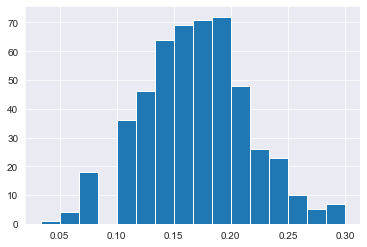

In [8]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16)
plt.show()

### Approximate sampling distributions

Earlier we saw that while increasing the number of replicates didn't affect the relative error of the sample means; it did result in a more consistent shape to the distribution.

In [12]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [14]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] +
                    dice['die3'] + dice['die4'] +
                    dice['die5'] ) / 5


dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


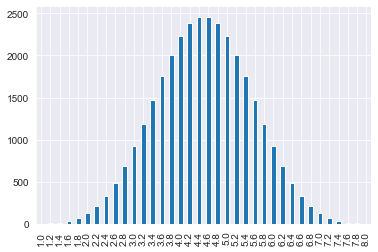

In [15]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

### Generating an approximate sampling distribution

It is only possible to calculate the exact sampling distribution in very simple situations. If just five eight-sided dice are used, the number of possible rolls is 8**5, which is over thirty thousand. The number of possible outcomes becomes too difficult to calculate when the dataset is more complicated, such as when a variable has hundreds or thousands of categories.

You can calculate an approximate sampling distribution by simulating the exact sampling distribution. You can repeat a procedure repeatedly to simulate both the sampling process and the sample statistic calculation process.

In [16]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

6.2


In [17]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean())


# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[4.0, 4.8, 5.4, 2.8, 3.4, 3.4, 4.0, 4.8, 5.0, 5.4]


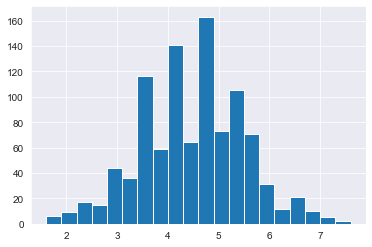

In [18]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

### Standard errors and the Central Limit Theorem

In statistics, the Gaussian distribution (also known as the normal distribution) is very important. It has a distinctive bell-shaped curve

**the central limit theorem**:
Averages of independent samples have approximately normal distributions
As the sample size increases,
* The distribution of the averages gets closer to being normally distributed
* The width of the sampling distribution gets narrower

**Standard error**:
* Standard deviation of the sampling distribution
* Important tool in understanding sampling variability
